In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import mean_squared_error, r2_score

In [4]:

train_path = "/content/train.csv"
test_path  = "/content/test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
selected_features = [
    "GrLivArea",
    "TotalBsmtSF",
    "BedroomAbvGr",
    "FullBath",
    "SalePrice"
]

df = train_df[selected_features]
df = df.dropna()
df.head()


,GrLivArea,TotalBsmtSF,BedroomAbvGr,FullBath,SalePrice
0,1710,856,3,2,208500
1,1262,1262,3,2,181500
2,1786,920,3,2,223500
3,1717,756,3,1,140000
4,2198,1145,4,2,250000


In [9]:
x = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)


In [10]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(x_test)

In [12]:
print(y_pred)

[126435.74373189 299663.13984156 139872.43373885 199123.18163904
 246990.72608493 107637.61136293 183704.65113929 174723.30157001
 107637.61136293 139770.65664187 176715.59537221 100759.05233825
 123214.97668053 215532.44166791 197034.78996    138272.72617783
 195057.93921774 148455.08410001 138801.06826545 207718.85129033
 217014.1678893  180908.62971352 170227.29230003 128762.56860059
 202733.34997907 191382.72136246 190713.56748561 119252.41102335
 190260.24773529 211591.80621409 112237.47345394 229364.99519153
 371691.53517835 130875.93695109 229133.5800997  135886.4605162
 201066.44121717 192766.38639379 246405.68836726  75677.62353776
 122413.82960473 231879.05219408 111318.55344166 283437.60386369
 116337.8032741  204417.17369928 125592.51607484 111978.98105119
 287081.84385521 153270.54951017 110502.58716236 239990.19342391
 103892.67858747 346346.53132253 136432.25513846 242755.26311661
 194247.12062509 162447.2657977  128792.02294076  71278.42774494
  93108.20395326 150415.86

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 1964228475.6246312
R-squared (R2): 0.7196085910058878
Root Mean Squared Error (RMSE): 44319.61727750626


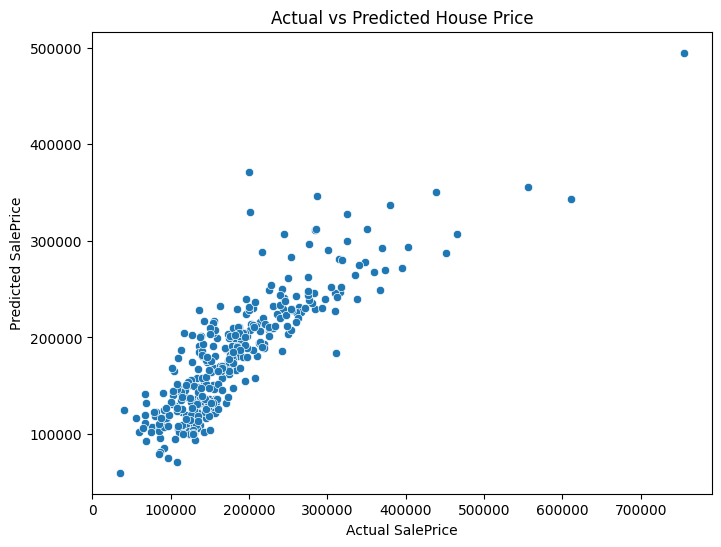

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_val, y=y_pred)
plt.title("Actual vs Predicted House Price")
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.show()


In [16]:
import joblib
joblib.dump(model, "house_price_linear_regression_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [18]:
lr_model = joblib.load("house_price_linear_regression_model.pkl")